In [1]:
import pandas as pd

# Sample dataset
data = {
    'CreditScore': [700, 600, 650, 720, 580, 690, 710],
    'Income': [50000, 40000, 45000, 55000, 35000, 48000, 53000],
    'LoanAmount': [20000, 15000, 18000, 22000, 12000, 16000, 21000],
    'EmploymentStatus': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'Approved': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)


In [2]:
df

,CreditScore,Income,LoanAmount,EmploymentStatus,Approved
0,700,50000,20000,Yes,Yes
1,600,40000,15000,No,No
2,650,45000,18000,Yes,Yes
3,720,55000,22000,Yes,Yes
4,580,35000,12000,No,No
5,690,48000,16000,Yes,Yes
6,710,53000,21000,Yes,Yes


In [3]:
df.head()

,CreditScore,Income,LoanAmount,EmploymentStatus,Approved
0,700,50000,20000,Yes,Yes
1,600,40000,15000,No,No
2,650,45000,18000,Yes,Yes
3,720,55000,22000,Yes,Yes
4,580,35000,12000,No,No


In [4]:
df.describe()

,CreditScore,Income,LoanAmount
count,7.000000,7.000000,7.000000
mean,664.285714,46571.428571,17714.285714
std,55.634864,7138.093650,3592.319850
min,580.000000,35000.000000,12000.000000
25%,625.000000,42500.000000,15500.000000
50%,690.000000,48000.000000,18000.000000
75%,705.000000,51500.000000,20500.000000
max,720.000000,55000.000000,22000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CreditScore       7 non-null      int64 
 1   Income            7 non-null      int64 
 2   LoanAmount        7 non-null      int64 
 3   EmploymentStatus  7 non-null      object
 4   Approved          7 non-null      object
dtypes: int64(3), object(2)
memory usage: 412.0+ bytes


In [6]:
df.isnull().sum()

CreditScore         0
Income              0
LoanAmount          0
EmploymentStatus    0
Approved            0
dtype: int64

In [7]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [8]:
df.columns

Index(['CreditScore', 'Income', 'LoanAmount', 'EmploymentStatus', 'Approved'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical column
le = LabelEncoder()
df['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])
df['Approved'] = le.fit_transform(df['Approved'])

# Features and target
X = df[['CreditScore', 'Income', 'LoanAmount', 'EmploymentStatus']]
y = df['Approved']


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


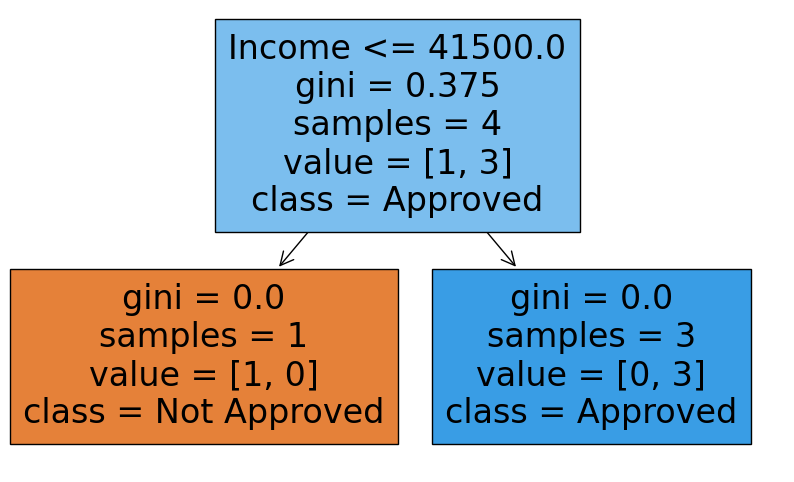

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True)
plt.show()


In [13]:
new_applicant = [[690, 47000, 18000, 1]]  # 1 = Employed
prediction = clf.predict(new_applicant)
print("Loan Approved" if prediction[0] == 1 else "Loan Rejected")


Loan Approved


C:\Users\vi200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
